# Caursera Capstone Project - Battle of Neighborhood
This is the capstone project created to fulfill the requirements of the Data Science Professional Certificate offered by IBM through Coursera. The idea is to use the techniques learned throughout the specialization to solve a real-world problem using data science. 

## Contents
### 1. Introduction - Five Ws
&emsp; 1.1 What is the problem? <br>
&emsp; 1.2 Where is this? <br>
&emsp; 1.3 When is this applicable? <br>
&emsp; 1.4 Why do we do this? <br>
&emsp; 1.5 Who cares? <br>

### 2. Data Selection

### 3. Data Preparation
Under construction

### 4. Data Analyze
Under Construction

### 5. Results
Under construction

### 6. Discussion
Under construction


## Contents
### 1. Introduction - Five Ws
#### &emsp; 1.1 What is the problem?
I work in downtown Memphis, TN. In general, I live 30 mins away from work, when there is no traffic. However, since I am commuting when most of the people are commuting to there work, there is almost always traffic on the roads. So it is easily 45-60 mins one-way trip. Being optimistic, considering one-way is 45 mins, it is 90 mins for a round trip. For a week with 5 workdays,  it is 7.5 hours, for a month it is 30 hours, for a year it is 16 days. So for a given year, I am wasting full 16 days counting days and nights riding my car wasting my time. 

**So the problem is, where I should move to save some time from driving but still have good amenities such as restaurants, cafes, parks, shopping, etc within reachable distance.** 

Also, one of the jobs I was being interviewed is in St. Louis, Illinois. I want to do a similar analyze there to find out if I can find a good neigbhorhood to live.

#### &emsp; 1.2 Where is this?
It is Memphis, Tennesse, where birds sing and elephants bath, just kidding. But it is definitely is a fantastic place to live. There are tons of things to do around here. The population was roughly 700 k and rising. The job market is good. Most people are friendly. You should have some BBQs around the town, you won't leave Memphis.

#### &emsp; 1.3 When is this applicable?
I know this is a changing world! The time will change everything. The time of this analysis is August 2019. So don't blame me if you decided to move based on this data analysis in 2050. But the good thing is, I developed the program to pull the latest data. So if you re-run the program in 2050, you should be (may be...) fine? 

#### &emsp; 1.4 Why do we do this?
It is to primarily to save time. I am spending so much time on the road, 16 full days per year! just to commute.  People say time is money. So it is to save me some money. I am sure if you are in the same boat, following this, you might able to save some money with this. Who doesn't like saving money for next cruise trip? Waight, is someone paying me when I save my own time? Ney.. I will use this saved time to play with my daughters. Not everything is money. I think I have bipolar disorder.

#### &emsp; 1.5 Who cares?
Do you even here me? It is to save money (really the time). If you are someone who cares about saving money (time), you should read. If you have plenty of those lying around that you don't know what to do, this is not for you. You should spend some money buying a boat and traveling the world instead of reading this. 


## 2. Data Selection
We need data to do our analysis. This section will gather all the required data and do the clean-up job so that the data are usable. I am hoping to gather neighborhood names from Wikipedia (use web scraping with BeautifulSoup package) and use FourSquare to obtain point of interest around the selected neighborhoods.

1.  Memphis Neighborhoods - The names of the Memphis neighborhoods will be obtained from the Wikipedia page
https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Memphis,_Tennessee This page just has the names of the neighborhoods. But that is all I need to get started. I can find the address, latitude, longitude, nearby point of interest details using  FourSquare module.

1. As mentioned before, I am going to use FourSquare to obtain point of interest data.

1. Later I am going to analize St. Louis data. Similar to Memphis, all I need is neighborhoods of St. Lois. The following wikipedia page has not only the neighborrod names, but also some Demographic data that I can use to do more analyze. https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis

## 3. Data Preparation (Don't grade beyond this point - under construction)

### 3.1 Load the required libraries.
I will start by importing some libraries. These libraries are not nessasarry use by this section. But to keep it clean, I will just do that.

In [1]:
# Install beautiul soup 4 (If not already installed!)
# This package will be used for web scraping.
try:
    from bs4 import BeautifulSoup as bs
    print('Beautiful Soup is ready for your service!')
except:
    !conda install -c anaconda beautifulsoup4 -y
    from bs4 import BeautifulSoup as bs
    print('Beautiful Soup is installed and ready for your service!')

Beautiful Soup is ready for your service!


In [2]:
# Install module to convert an address into latitude and longitude values
try:
    from geopy.geocoders import Nominatim 
    from geopy import distance
    print('GeoCorder is ready for your service!')
except:
    !conda install -c conda-forge geopy --yes 
    from geopy.geocoders import Nominatim 
    from geopy import distance
    print('Geocorder is installed and ready for your service!')
    

GeoCorder is ready for your service!


In [3]:
# Install Folium - the map rendering library
try:
    import folium
    print('Folium is ready for your service!')
except:
    !conda install -c conda-forge folium=0.5.0
    import folium
    print('Foalium is installed and ready for your service!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [5]:
# import libraries
import pandas as pd
import requests as rs
import numpy as np

import matplotlib.cm as cm
import matplotlib.colors as colors

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans


### 2.2 Get the required data
Let's start thinking about data.


In [6]:
# Following wikipedia page has all the neighborhood data. Let's use Beautiful Soup to get the required data.
url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Memphis,_Tennessee'
source = rs.get(url)
soup = bs(source.content,'lxml')
 # print(soup.prettify())

In [7]:
tocs = soup.body.findAll('span',{'class' :'toctext' })

# Obtain burrows
burrow = []

for item in tocs:
    burrow.append(item.text)

print(burrow)
# Remove last item ('see also')
burrow = burrow[0:-1]
print(burrow)
    
    

['Downtown', 'Midtown', 'University District', 'East Memphis', 'North Memphis', 'Northeast', 'South Memphis', 'Southeast', 'East Parkway District', 'See also']
['Downtown', 'Midtown', 'University District', 'East Memphis', 'North Memphis', 'Northeast', 'South Memphis', 'Southeast', 'East Parkway District']


In [8]:
contents = soup.body.findAll('ul')

# Create array with burrow and neighborhood data
neighborhood = []

for i in range(1,len(burrow)+1):
    for litag in contents[i].findAll('li'):
        #print(litag.text)
        neighborhood.append([burrow[i-1],litag.text])

#print(neighborhood)

df = pd.DataFrame(neighborhood, columns=['Burrow','Neighborhood'])
df

,Burrow,Neighborhood
0,Downtown,Central Business District
1,Downtown,Edge District
2,Downtown,Harbor Town
3,Downtown,Linden
4,Downtown,Medical District
5,Downtown,Pinch District
6,Downtown,South Forum
7,Downtown,South Main Arts District
8,Downtown,Speedway Terrace
9,Downtown,Uptown/Greenlaw


In [9]:
# Create a function to reutn the distance from work
geolocator = Nominatim(user_agent="foursquare_agent", format_string="%s, Memphis TN" )

address = '1003 Monroe Ave'
location = geolocator.geocode(address)
lat0= location.latitude
lon0 = location.longitude
address0 = location.address
print(lat0, lon0)
print(address0)


35.1389307755102 -90.0281921632653
1003, Monroe Avenue, Medical District, Memphis, Shelby County, Tennessee, 38104, USA


In [176]:
def find_distance(lat,lon,lat0,lon0):
    p1 = (lat0,lon0)
    p2 = (lat,lon)
    #print(p1,p2)
    return distance.distance(p1,p2).miles

In [11]:


Lat = []
Lon =[]
address = []
distance_to_work = []

for i in range(df.shape[0]):
    try:
        location = geolocator.geocode(df['Neighborhood'][i])
        print('.', end = ' ')
    except:
        location = None
    
    if location != None:
        Lat.append(location.latitude)
        Lon.append(location.longitude)
        address.append(location.address)
        distance_to_work.append(find_distance(location.latitude,location.longitude,lat0,lon0))
    else:
        Lat.append('NaN')
        Lon.append('NaN')
        address.append('NaN')
        distance_to_work.append('NaN')
        


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [12]:
df['Latitude'] = Lat
df['Longitude'] = Lon
df['Address'] = address
df['miles_to_work'] = distance_to_work



In [13]:
# let's drop neighborhoods with incomplete info
df.replace(["NaN", 'NaT'], np.nan, inplace = True)
df = df.dropna().reset_index(drop=True)
df

,Burrow,Neighborhood,Latitude,Longitude,Address,miles_to_work
0,Downtown,Edge District,35.159758,-90.054260,"Harbor Edge Drive, Cotton Row Historic Distric...",2.059134
1,Downtown,Linden,35.134366,-90.012674,"Linden Avenue, Medical District, Memphis, Shel...",0.933456
2,Downtown,Medical District,35.141978,-90.030331,"Medical District, Memphis, Shelby County, Tenn...",0.242472
3,Downtown,Winchester Park,35.152504,-90.036226,"Winchester Park, Medical District, Memphis, Sh...",1.040378
4,Midtown,Annesdale,35.125646,-90.017868,"Annesdale-Snowden, Shelby County, Tennessee, 3...",1.086541
5,Midtown,Belleair,35.141008,-89.993866,"Belleair Drive, Memphis, Shelby County, Tennes...",1.949034
6,Midtown,Central Gardens,35.210909,-89.919357,"Austin Peay Highway, Memphis, Shelby County, T...",7.910214
7,Midtown,Chickasaw Gardens,35.128701,-89.962867,"Chickasaw Gardens, Shelby County, Tennessee, 3...",3.766065
8,Midtown,Crosstown,35.152437,-90.012226,"Crosstown, Memphis, Shelby County, Tennessee, ...",1.297780
9,Midtown,Evergreen,35.168745,-90.000303,"North Evergreen Street, Memphis, Shelby County...",2.591853


In [14]:
# @hidden_cell
CLIENT_ID = 'VAJHMQEGTYDIZAR4KG324AIXRQQKXDPHUP4YYR1XHD0CVFUJ' # your Foursquare ID
CLIENT_SECRET = '4UYYMOIRZYHXP3XPWVFG1YNZX0KAKIGIZUPBDJKQ3VVI5IHH' # your Foursquare Secret
VERSION = '20190806' # Foursquare API version

In [15]:
# @hidden_cell
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Lat[1], 
    Lon[1], 
    radius, 
    LIMIT)
#url # display URL

Send the GET request and examine the resutls

In [16]:
results = rs.get(url).json()

Let's create a function to get catogory types

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Little Cafe Eclectic,Coffee Shop,35.160896,-90.053805
1,Miss Cordelia's Grocery,Grocery Store,35.161108,-90.053721
2,River Inn of Harbor Town,Hotel,35.161147,-90.055029
3,Terrace at the River Inn,Bar,35.161136,-90.055061
4,NailBar & Co,Nail Salon,35.160859,-90.053667


In [190]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('.', end = '')
        # print(lat)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = rs.get(url).json()["response"]['groups'][0]['items']
        except:
            print('Error: ' + name, end = '')
                
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print(' done!')
    return(nearby_venues)


In [20]:
Memphis_venues = getNearbyVenues(names=df['Neighborhood'],
                                    latitudes = df['Latitude'], longitudes = df['Longitude'])

Edge District
Linden
Medical District
Winchester Park
Annesdale
Belleair
Central Gardens
Chickasaw Gardens
Crosstown
Evergreen
Idlewild
Lenox
Rozelle
East Buntyn
Normal Station
Joffre
Messick-Buntyn
Red Acres
Balmoral/Quince
Berryhill
Cherry/Willow
Fisherville
High Point Terrace
River Oaks
Sea Isle Park
White Station
Douglass
Frayser
Hollywood
Klondike
Binghampton
Nutbush
Raleigh
Heights
Boxtown
Bunker Hill
Coro Lake
Dixie Heights
French Fort
Longview
Mallory Heights
Nehemiah
Pine Hill
Riverside
Soulsville
Walker Homes
West Junction
Westwood
Whitehaven
Capleville
Castalia
Cherokee
Easthaven
Fairlawn
Magnolia
Oakhaven
Orange Mound
Parkway Village
Riverdale
Southwind
Fairgrounds
Glenview
Lamar Avenue (Highway 78)
Poplar Avenue


In [21]:
print(Memphis_venues.shape)
Memphis_venues.head()

(557, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Edge District,35.159758,-90.05426,Little Cafe Eclectic,35.160896,-90.053805,Coffee Shop
1,Edge District,35.159758,-90.05426,Miss Cordelia's Grocery,35.161108,-90.053721,Grocery Store
2,Edge District,35.159758,-90.05426,River Inn of Harbor Town,35.161147,-90.055029,Hotel
3,Edge District,35.159758,-90.05426,Terrace at the River Inn,35.161136,-90.055061,Bar
4,Edge District,35.159758,-90.05426,NailBar & Co,35.160859,-90.053667,Nail Salon


In [22]:
Memphis_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annesdale,4,4,4,4,4,4
Belleair,17,17,17,17,17,17
Berryhill,6,6,6,6,6,6
Binghampton,17,17,17,17,17,17
Bunker Hill,1,1,1,1,1,1
Capleville,10,10,10,10,10,10
Castalia,2,2,2,2,2,2
Central Gardens,7,7,7,7,7,7
Cherry/Willow,4,4,4,4,4,4


In [23]:
print('There are {} uniques categories.'.format(len(Memphis_venues['Venue Category'].unique())))

There are 164 uniques categories.


## 3. Analyze Each Neighborhood


In [24]:
# one hot encoding
Memphis_onehot = pd.get_dummies(Memphis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
Memphis_onehot['Neighborhood'] = Memphis_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Memphis_onehot.columns[-1]] + list(Memphis_onehot.columns[:-1])
Memphis_onehot = Memphis_onehot[fixed_columns]

Memphis_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,...,Train Station,Travel & Transport,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wings Joint,Women's Store
0,Edge District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Edge District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Edge District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Edge District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Edge District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Memphis_grouped = Memphis_onehot.groupby('Neighborhood').mean().reset_index()
Memphis_grouped.head()

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,...,Train Station,Travel & Transport,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wings Joint,Women's Store
0,Annesdale,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Belleair,0.00,0.000000,0.000000,0.058824,0.058824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.058824,0.0,0.0
2,Berryhill,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Binghampton,0.00,0.058824,0.117647,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Bunker Hill,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [26]:

Memphis_grouped.shape

(57, 165)

In [27]:
num_top_venues = 5

for hood in Memphis_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Memphis_grouped[Memphis_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annesdale----
                 venue  freq
0       Discount Store  0.50
1                  Gym  0.25
2  American Restaurant  0.25
3               Lounge  0.00
4          Record Shop  0.00


----Belleair----
                venue  freq
0         Music Venue  0.18
1          Sports Bar  0.06
2  Seafood Restaurant  0.06
3        Noodle House  0.06
4       Deli / Bodega  0.06


----Berryhill----
            venue  freq
0  Discount Store  0.17
1   Tanning Salon  0.17
2        Pharmacy  0.17
3     Pizza Place  0.17
4  Shipping Store  0.17


----Binghampton----
                    venue  freq
0             Art Gallery  0.12
1  Furniture / Home Store  0.12
2             Pizza Place  0.06
3              Skate Park  0.06
4          Breakfast Spot  0.06


----Bunker Hill----
                 venue  freq
0  Rental Car Location   1.0
1  American Restaurant   0.0
2     Ramen Restaurant   0.0
3            Pawn Shop   0.0
4            Pet Store   0.0


----Capleville----
                 venue  fr

                             venue  freq
0                            Hotel  0.18
1                             Park  0.05
2                           Lawyer  0.05
3                   Sandwich Place  0.05
4  Southern / Soul Food Restaurant  0.05


----Poplar Avenue----
                 venue  freq
0               Lawyer  0.18
1     Business Service  0.09
2         Intersection  0.09
3       Sandwich Place  0.09
4  Fried Chicken Joint  0.09


----Raleigh----
                  venue  freq
0        Discount Store  0.25
1             Rock Club  0.25
2                Lounge  0.25
3  Fast Food Restaurant  0.25
4           Record Shop  0.00


----Red Acres----
                  venue  freq
0          Burger Joint  0.25
1  Gym / Fitness Center  0.25
2            Playground  0.25
3           Music Venue  0.25
4   American Restaurant  0.00


----Riverdale----
                  venue  freq
0  Fast Food Restaurant  0.17
1     Indian Restaurant  0.08
2            Restaurant  0.08
3        Discount 

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Memphis_grouped['Neighborhood']

for ind in np.arange(Memphis_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Memphis_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annesdale,Discount Store,American Restaurant,Gym,Food Court,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium
1,Belleair,Music Venue,Deli / Bodega,Seafood Restaurant,Noodle House,Sports Bar,Burger Joint,Movie Theater,Mexican Restaurant,Bar,Cajun / Creole Restaurant
2,Berryhill,Pizza Place,Discount Store,Rental Car Location,Tanning Salon,Shipping Store,Pharmacy,Women's Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium
3,Binghampton,Furniture / Home Store,Art Gallery,Coffee Shop,Brewery,Pet Store,Bar,Pizza Place,Skate Park,Gift Shop,Breakfast Spot
4,Bunker Hill,Rental Car Location,Women's Store,Food & Drink Shop,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court


## 4. Cluster Neighbourhoods


In [30]:
# set number of clusters
kclusters = 5
Memphis_grouped_clustering = Memphis_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Memphis_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [31]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)   
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # Uncomment this when run first time

Memphis_merged = df
Memphis_merged.head()
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Memphis_merged = Memphis_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Memphis_merged.head() # check the last columns!

# Drop the rows with no cluster labels
Memphis_merged.dropna(inplace=True)

Memphis_merged

,Burrow,Neighborhood,Latitude,Longitude,Address,miles_to_work,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Edge District,35.159758,-90.054260,"Harbor Edge Drive, Cotton Row Historic Distric...",2.059134,3.0,American Restaurant,Trail,Sporting Goods Shop,Nail Salon,Coffee Shop,Grocery Store,Harbor / Marina,Theme Restaurant,Scenic Lookout,Bar
1,Downtown,Linden,35.134366,-90.012674,"Linden Avenue, Medical District, Memphis, Shel...",0.933456,3.0,Shipping Store,Mobile Phone Shop,Music Venue,Southern / Soul Food Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Karaoke Bar,Nightclub,Miscellaneous Shop
2,Downtown,Medical District,35.141978,-90.030331,"Medical District, Memphis, Shelby County, Tenn...",0.242472,3.0,Sandwich Place,Food Court,Lawyer,Light Rail Station,Fast Food Restaurant,Fried Chicken Joint,Clothing Store,Women's Store,Garden,Furniture / Home Store
3,Downtown,Winchester Park,35.152504,-90.036226,"Winchester Park, Medical District, Memphis, Sh...",1.040378,3.0,Gym / Fitness Center,BBQ Joint,Women's Store,Food Court,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium
4,Midtown,Annesdale,35.125646,-90.017868,"Annesdale-Snowden, Shelby County, Tennessee, 3...",1.086541,3.0,Discount Store,American Restaurant,Gym,Food Court,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium
5,Midtown,Belleair,35.141008,-89.993866,"Belleair Drive, Memphis, Shelby County, Tennes...",1.949034,3.0,Music Venue,Deli / Bodega,Seafood Restaurant,Noodle House,Sports Bar,Burger Joint,Movie Theater,Mexican Restaurant,Bar,Cajun / Creole Restaurant
6,Midtown,Central Gardens,35.210909,-89.919357,"Austin Peay Highway, Memphis, Shelby County, T...",7.910214,3.0,Fast Food Restaurant,Restaurant,Arts & Crafts Store,Mexican Restaurant,Gas Station,Department Store,Donut Shop,Food Truck,Garden Center,Garden
7,Midtown,Chickasaw Gardens,35.128701,-89.962867,"Chickasaw Gardens, Shelby County, Tennessee, 3...",3.766065,3.0,Toy / Game Store,Café,Science Museum,Movie Theater,Women's Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck
8,Midtown,Crosstown,35.152437,-90.012226,"Crosstown, Memphis, Shelby County, Tennessee, ...",1.297780,3.0,Pharmacy,Cosmetics Shop,Café,Burger Joint,Building,Brewery,Coffee Shop,Music Venue,Shipping Store,Pizza Place
9,Midtown,Evergreen,35.168745,-90.000303,"North Evergreen Street, Memphis, Shelby County...",2.591853,3.0,Construction & Landscaping,Music Venue,Women's Store,Food Court,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium


In [32]:
# create map

# lat lon for toronto
latitude = 35.14953
longitude = -90.04898

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Memphis_merged

# add markers to the map
#markers_colors = []
for lat, lon, poi, cluster, miles in zip(Memphis_merged['Latitude'], Memphis_merged['Longitude'], Memphis_merged['Neighborhood'], Memphis_merged['Cluster Labels'].astype('int'),Memphis_merged['miles_to_work']):
    label = folium.Popup(str(poi)  + ' Cluster ' + str(cluster) + " " +  str(round(miles,2)) + " miles", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [55]:
# Following wikipedia page has all the neighborhood data. Let's use Beautiful Soup to get the required data.
url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis'
source = rs.get(url)
soup = bs(source.content,'lxml')
 # print(soup.prettify())

In [127]:
contents = soup.body.findAll('table')

#print(contents)

# Variables to store data
column_titles = []

table_data = []
# Table data
for trtag in contents[1].findAll('tr'):
    #print(trtag)
    #print(trtag.text)
    #column_titles.append(trtag.text.strip())'
    #print('zzz')
    data_row = trtag.text.strip()
    data_row = data_row.split('\n')
    #data_row = data_row.replace("\n",",")
    #print(data_row)
    table_data.append(data_row)

# First line is column titles
column_titles = table_data[0]
del(table_data[0]) # Remove firt line from the table data

#print(column_titles)
#print(table_data)

st_louis_df = pd.DataFrame(table_data, columns = column_titles)
# pd.DataFrame(neighborhood, columns=['Burrow','Neighborhood'])

st_louis_df.head()


,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor
0,Academy,"3,006",16.9,54.7,20.5,1.52,4.3,3.5,North
1,Baden,"7,268",6.3,91.8,0.5,0.1,0,1.3,North
2,Benton Park,"3,532",68.2,25.1,3.2,0.3,1.2,3.8,South
3,Benton Park West,"4,404",28.0,59.6,10.5,0,1.9,5.1,South
4,Bevo Mill,"12,654",74.2,13.8,7.5,0.4,4.6,3.9,South


In [103]:
# How many neighborhoods (There suppose to be 79 neighborhoods, Yes, I counted number of neighborhoods in the wiki page)
st_louis_df.shape

(79, 9)

In [128]:
# Covert the numbers to numbers
print("Before...")
print(st_louis_df.dtypes)
st_louis_df.Population = st_louis_df.Population.str.replace(',', '')
st_louis_df.Population = pd.to_numeric(st_louis_df.Population)
st_louis_df.White = pd.to_numeric(st_louis_df.White)
st_louis_df.Black = pd.to_numeric(st_louis_df.Black)
st_louis_df["Hispanic/Latino2"] = pd.to_numeric(st_louis_df["Hispanic/Latino2"])
st_louis_df.AIAN1 = pd.to_numeric(st_louis_df.AIAN1)
st_louis_df.Asian = pd.to_numeric(st_louis_df.Asian)
st_louis_df["Mixed Race"] = pd.to_numeric(st_louis_df["Mixed Race"])

print("\n Now...")
print(st_louis_df.dtypes)

Before...
Neighborhood        object
Population          object
White               object
Black               object
Hispanic/Latino2    object
AIAN1               object
Asian               object
Mixed Race          object
Corridor            object
dtype: object

 Now...
Neighborhood         object
Population            int64
White               float64
Black               float64
Hispanic/Latino2    float64
AIAN1               float64
Asian               float64
Mixed Race          float64
Corridor             object
dtype: object


In [129]:
st_louis_df.head()

,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor
0,Academy,3006,16.9,54.7,20.5,1.52,4.3,3.5,North
1,Baden,7268,6.3,91.8,0.5,0.10,0.0,1.3,North
2,Benton Park,3532,68.2,25.1,3.2,0.30,1.2,3.8,South
3,Benton Park West,4404,28.0,59.6,10.5,0.00,1.9,5.1,South
4,Bevo Mill,12654,74.2,13.8,7.5,0.40,4.6,3.9,South


In [139]:
# Which region is popular for different ethnic groups?
st_louis_mean_demogra = st_louis_df.groupby('Corridor').mean()
st_louis_mean_demogra.drop("Population", axis = 1, inplace = True)
st_louis_mean_demogra

,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race
Corridor,,,,,,
Central,51.820000,40.145000,2.645000,0.210000,4.640000,2.500000
North,7.148387,88.912903,2.306452,0.239355,0.435484,1.470968
South,64.967857,27.175000,4.625000,0.292857,2.389286,3.403571


It looks like most white popole live in South side has more white people, north side is dominated by black people, Asian tends to go in the Central reagin. Let's try to see this graphically.

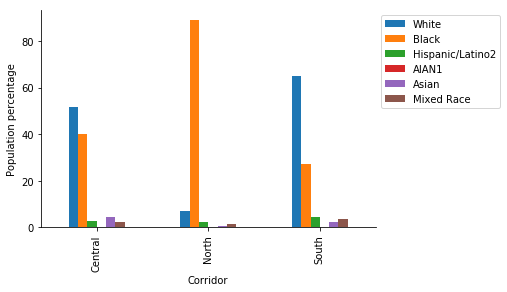

In [161]:
ax = st_louis_mean_demogra.plot.bar()
ax.set_ylabel('Population percentage')
ax.legend(bbox_to_anchor=(1, 1.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [177]:
# Get the latitude and logitude of the each neighborhood
geolocator = Nominatim(user_agent="foursquare_agent", format_string="%s, St. Louis" )

Lat = []
Lon =[]
address = []
distance_to_work = []

# Latitude longitude for the prospective work place in St. Louis
Lat0 = 38.625145
Lon0 = -90.191127

for i in range(st_louis_df.shape[0]):
    try:
        location = geolocator.geocode(st_louis_df['Neighborhood'][i])
        print('.', end = ' ')
    except:
        location = None
    
    if location != None:
        Lat.append(location.latitude)
        Lon.append(location.longitude)
        address.append(location.address)
        distance_to_work.append(find_distance(location.latitude,location.longitude,Lat0, Lon0))
    else:
        Lat.append('NaN')
        Lon.append('NaN')
        address.append('NaN')
        distance_to_work.append('NaN')

print('Done!')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Done!


In [178]:
# Add lat lon to the data frame
st_louis_df['Latitude'] = Lat
st_louis_df['Longitude'] = Lon
st_louis_df['Address'] = address
st_louis_df['miles_to_work'] = distance_to_work
st_louis_df.head()

,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor,Latitude,Longitude,Address,miles_to_work
0,Academy,3006,16.9,54.7,20.5,1.52,4.3,3.5,North,38.6584,-90.2672,"Academy, Saint Louis, City of Saint Louis, Mis...",4.71342
1,Baden,7268,6.3,91.8,0.5,0.10,0.0,1.3,North,38.7175,-90.2316,"Baden, Saint Louis, City of Saint Louis, Misso...",6.73694
2,Benton Park,3532,68.2,25.1,3.2,0.30,1.2,3.8,South,38.5987,-90.2198,"Benton Park, Saint Louis, City of Saint Louis,...",2.39448
3,Benton Park West,4404,28.0,59.6,10.5,0.00,1.9,5.1,South,38.598,-90.23,"Benton Park West, Saint Louis, City of Saint L...",2.81799
4,Bevo Mill,12654,74.2,13.8,7.5,0.40,4.6,3.9,South,38.5813,-90.2672,"Bevo Mill, Saint Louis, City of Saint Louis, M...",5.10546


In [191]:
st_louis_venues = getNearbyVenues(names=st_louis_df['Neighborhood'],
                                    latitudes = st_louis_df['Latitude'], longitudes = st_louis_df['Longitude'])

....................................Error: JeffVanderLou.............................Error: South Hampton.............. done!


In [192]:
st_louis_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Academy,6,6,6,6,6,6
Baden,4,4,4,4,4,4
Benton Park,22,22,22,22,22,22
Benton Park West,19,19,19,19,19,19
Bevo Mill,12,12,12,12,12,12
Botanical Heights,8,8,8,8,8,8
Boulevard Heights,5,5,5,5,5,5
Carondelet,5,5,5,5,5,5
Central West End,66,66,66,66,66,66


In [193]:
print('There are {} uniques categories.'.format(len(Memphis_venues['Venue Category'].unique())))

There are 164 uniques categories.


### Analyze each neighborhood

In [194]:
# one hot encoding
st_louis_onehot = pd.get_dummies(st_louis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
st_louis_onehot['Neighborhood'] = st_louis_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [st_louis_onehot.columns[-1]] + list(st_louis_onehot.columns[:-1])
st_louis_onehot = st_louis_onehot[fixed_columns]

st_louis_onehot.head()

,Neighborhood,ATM,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,...,Track,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waste Facility,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Academy,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
st_louis_grouped = st_louis_onehot.groupby('Neighborhood').mean().reset_index()
st_louis_grouped.head()

,Neighborhood,ATM,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,...,Track,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waste Facility,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Academy,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Baden,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Benton Park,0.0,0.0,0.0,0.045455,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.045455,0.0,0.0,0.0
3,Benton Park West,0.0,0.0,0.0,0.000000,0.0,0.000000,0.105263,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Bevo Mill,0.0,0.0,0.0,0.000000,0.0,0.083333,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [199]:
num_top_venues = 5

for hood in st_louis_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = st_louis_grouped[st_louis_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Academy----
                venue  freq
0       Grocery Store  0.17
1   Convenience Store  0.17
2            Pharmacy  0.17
3         Video Store  0.17
4  Chinese Restaurant  0.17


----Baden----
                   venue  freq
0                   Food  0.50
1                    Bar  0.25
2   Fast Food Restaurant  0.25
3                    ATM  0.00
4  Outdoors & Recreation  0.00


----Benton Park----
         venue  freq
0      Brewery  0.09
1  Beer Garden  0.09
2     Dive Bar  0.09
3      Gay Bar  0.05
4         Park  0.05


----Benton Park West----
                venue  freq
0  Mexican Restaurant  0.32
1         Pizza Place  0.16
2         Art Gallery  0.11
3              Bakery  0.05
4   Convenience Store  0.05


----Bevo Mill----
                venue  freq
0                 Bar  0.17
1      Discount Store  0.08
2          Restaurant  0.08
3                Food  0.08
4  Mexican Restaurant  0.08


----Botanical Heights----
            venue  freq
0             Bar  0.25
1  Scen

                             venue  freq
0                   Sandwich Place  0.09
1                      Yoga Studio  0.04
2                        Rock Club  0.04
3                          Brewery  0.04
4  Southern / Soul Food Restaurant  0.04


----Mount Pleasant----
                 venue  freq
0                  Pub  0.50
1        Grocery Store  0.25
2  American Restaurant  0.25
3                 Park  0.00
4        Moving Target  0.00


----Near North Riverfront----
                 venue  freq
0                Hotel   1.0
1  Monument / Landmark   0.0
2        Moving Target   0.0
3               Museum   0.0
4          Music Venue   0.0


----North Hampton----
           venue  freq
0   Dessert Shop   0.5
1  Event Service   0.5
2           Park   0.0
3  Moving Target   0.0
4         Museum   0.0


----North Point----
                   venue  freq
0                    Bar   1.0
1                    ATM   0.0
2  Outdoors & Recreation   0.0
3          Moving Target   0.0
4         

In [200]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = st_louis_grouped['Neighborhood']

for ind in np.arange(Memphis_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(st_louis_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Academy,Outdoors & Recreation,Convenience Store,Pharmacy,Video Store,Grocery Store,Chinese Restaurant,Event Service,Filipino Restaurant,Festival,Fast Food Restaurant
1,Baden,Food,Bar,Fast Food Restaurant,Yoga Studio,Farm,Food Truck,Food & Drink Shop,Flea Market,Filipino Restaurant,Festival
2,Benton Park,Brewery,Dive Bar,Beer Garden,Brazilian Restaurant,Gift Shop,Café,Breakfast Spot,Cocktail Bar,Bar,Bakery
3,Benton Park West,Mexican Restaurant,Pizza Place,Art Gallery,Restaurant,Intersection,Taco Place,Bakery,Music Venue,Locksmith,Convenience Store
4,Bevo Mill,Bar,Mexican Restaurant,Taco Place,Food,Discount Store,Arcade,Eastern European Restaurant,Lounge,Museum,German Restaurant


In [202]:
# set number of clusters
kclusters = 5
Memphis_grouped_clustering = st_louis_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Memphis_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 2, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       3, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0], dtype=int32)

In [205]:
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)   
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # Uncomment this when run first time

st_louis_merged = st_louis_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
st_louis_merged = st_louis_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Memphis_merged.head() # check the last columns!

# Drop the rows with no cluster labels
st_louis_merged.dropna(inplace=True)

st_louis_merged

,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor,Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Academy,3006,16.9,54.7,20.5,1.52,4.3,3.5,North,38.6584,...,Outdoors & Recreation,Convenience Store,Pharmacy,Video Store,Grocery Store,Chinese Restaurant,Event Service,Filipino Restaurant,Festival,Fast Food Restaurant
1,Baden,7268,6.3,91.8,0.5,0.10,0.0,1.3,North,38.7175,...,Food,Bar,Fast Food Restaurant,Yoga Studio,Farm,Food Truck,Food & Drink Shop,Flea Market,Filipino Restaurant,Festival
2,Benton Park,3532,68.2,25.1,3.2,0.30,1.2,3.8,South,38.5987,...,Brewery,Dive Bar,Beer Garden,Brazilian Restaurant,Gift Shop,Café,Breakfast Spot,Cocktail Bar,Bar,Bakery
3,Benton Park West,4404,28.0,59.6,10.5,0.00,1.9,5.1,South,38.598,...,Mexican Restaurant,Pizza Place,Art Gallery,Restaurant,Intersection,Taco Place,Bakery,Music Venue,Locksmith,Convenience Store
4,Bevo Mill,12654,74.2,13.8,7.5,0.40,4.6,3.9,South,38.5813,...,Bar,Mexican Restaurant,Taco Place,Food,Discount Store,Arcade,Eastern European Restaurant,Lounge,Museum,German Restaurant
5,Botanical Heights,1037,20.3,74.4,2.1,0.20,1.7,2.6,Central,38.6211,...,Bar,Music Venue,Garden,Restaurant,Farm,Clothing Store,Scenic Lookout,Yoga Studio,Falafel Restaurant,Filipino Restaurant
6,Boulevard Heights,8708,89.5,3.6,3.5,0.30,3.6,2.0,South,38.5607,...,Women's Store,Gym,Lake,Food Truck,Discount Store,Dive Bar,Farm,Food & Drink Shop,Food,Flea Market
7,Carondelet,8661,57.3,33.8,7.1,0.60,1.3,3.7,South,38.5567,...,Breakfast Spot,Convenience Store,Dive Bar,Museum,Café,Yoga Studio,Farmers Market,Food,Flea Market,Filipino Restaurant
9,Central West End,14473,58.0,28.0,2.7,0.20,11.1,2.2,Central,38.6425,...,Sandwich Place,Pizza Place,Hotel,Chinese Restaurant,New American Restaurant,Dessert Shop,Salon / Barbershop,Mediterranean Restaurant,Thai Restaurant,Ice Cream Shop
10,Cheltenham,620,67.3,15.0,3.7,0.20,10.6,5.6,Central,38.6273,...,Bar,Yoga Studio,Antique Shop,Sandwich Place,Brewery,Coffee Shop,Hotel,American Restaurant,Pet Store,Farmers Market


In [240]:
# create map

# lat lon for toronto
latitude = Lat0
longitude = Lon0

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Memphis_merged

# add markers to the map
#markers_colors = []
for lat, lon, poi, cluster, miles in zip(st_louis_merged['Latitude'], st_louis_merged['Longitude'], st_louis_merged['Neighborhood'], st_louis_merged['Cluster Labels'].astype('int'),st_louis_merged['miles_to_work']):
    miles = str(round(float(miles),1))
    label = folium.Popup(str(poi)  + ' Cluster ' + str(cluster) + " " + miles + " miles", parse_html=True)
    #label = folium.Popup(str(poi))
    
    #print(label.dtype())
    try:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters) 
    except:
        pass
       
map_clusters